In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR 


In [48]:

drugs = pd.read_csv(r'C:\Users\ACER\Downloads\drug200.csv')
drugs

Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]

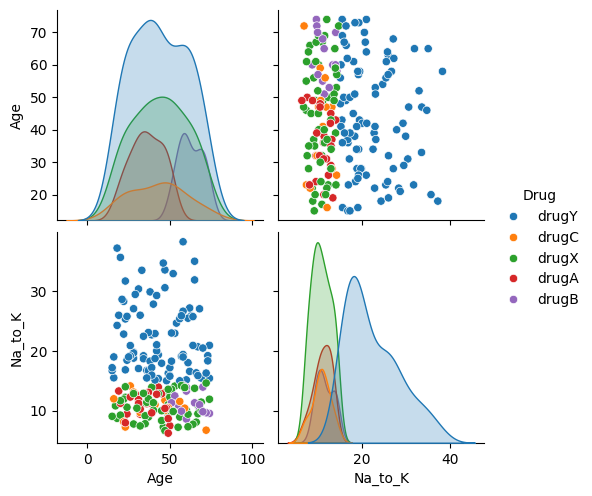

In [49]:
sns.pairplot(data=drugs, hue='Drug');

In [50]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [51]:
drugs.describe(include='O')

Sex    BP Cholesterol   Drug
count   200   200         200    200
unique    2     3           2      5
top       M  HIGH        HIGH  drugY
freq    104    77         103     91

In [52]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
cols = drugs.select_dtypes(include='O').columns

for col in cols:
    
    drugs[col] = label_enc.fit_transform(drugs[col])


drugs

Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    0   0            0   25.355     4
1     47    1   1            0   13.093     2
2     47    1   1            0   10.114     2
3     28    0   2            0    7.798     3
4     61    0   1            0   18.043     4
..   ...  ...  ..          ...      ...   ...
195   56    0   1            0   11.567     2
196   16    1   1            0   12.006     2
197   52    1   2            0    9.894     3
198   23    1   2            1   14.020     3
199   40    0   1            1   11.349     3

[200 rows x 6 columns]

In [53]:
X = drugs.drop(columns='Drug')
y = drugs['Drug']

In [54]:
display(X.head(3), y.head(3))

Age  Sex  BP  Cholesterol  Na_to_K
0   23    0   0            0   25.355
1   47    1   1            0   13.093
2   47    1   1            0   10.114

0    4
1    2
2    2
Name: Drug, dtype: int32

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [56]:
tree_clf0 = DTC()
tree_clf0.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
tree_clf0.score(X_train, y_train)

1.0

In [58]:
tree_clf0.score(X_test, y_test)

1.0

In [59]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = tree_clf0.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [60]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



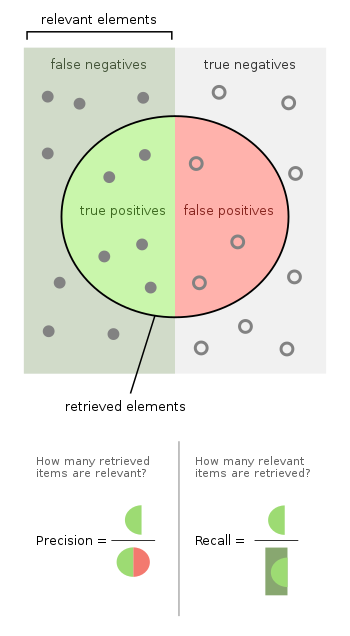

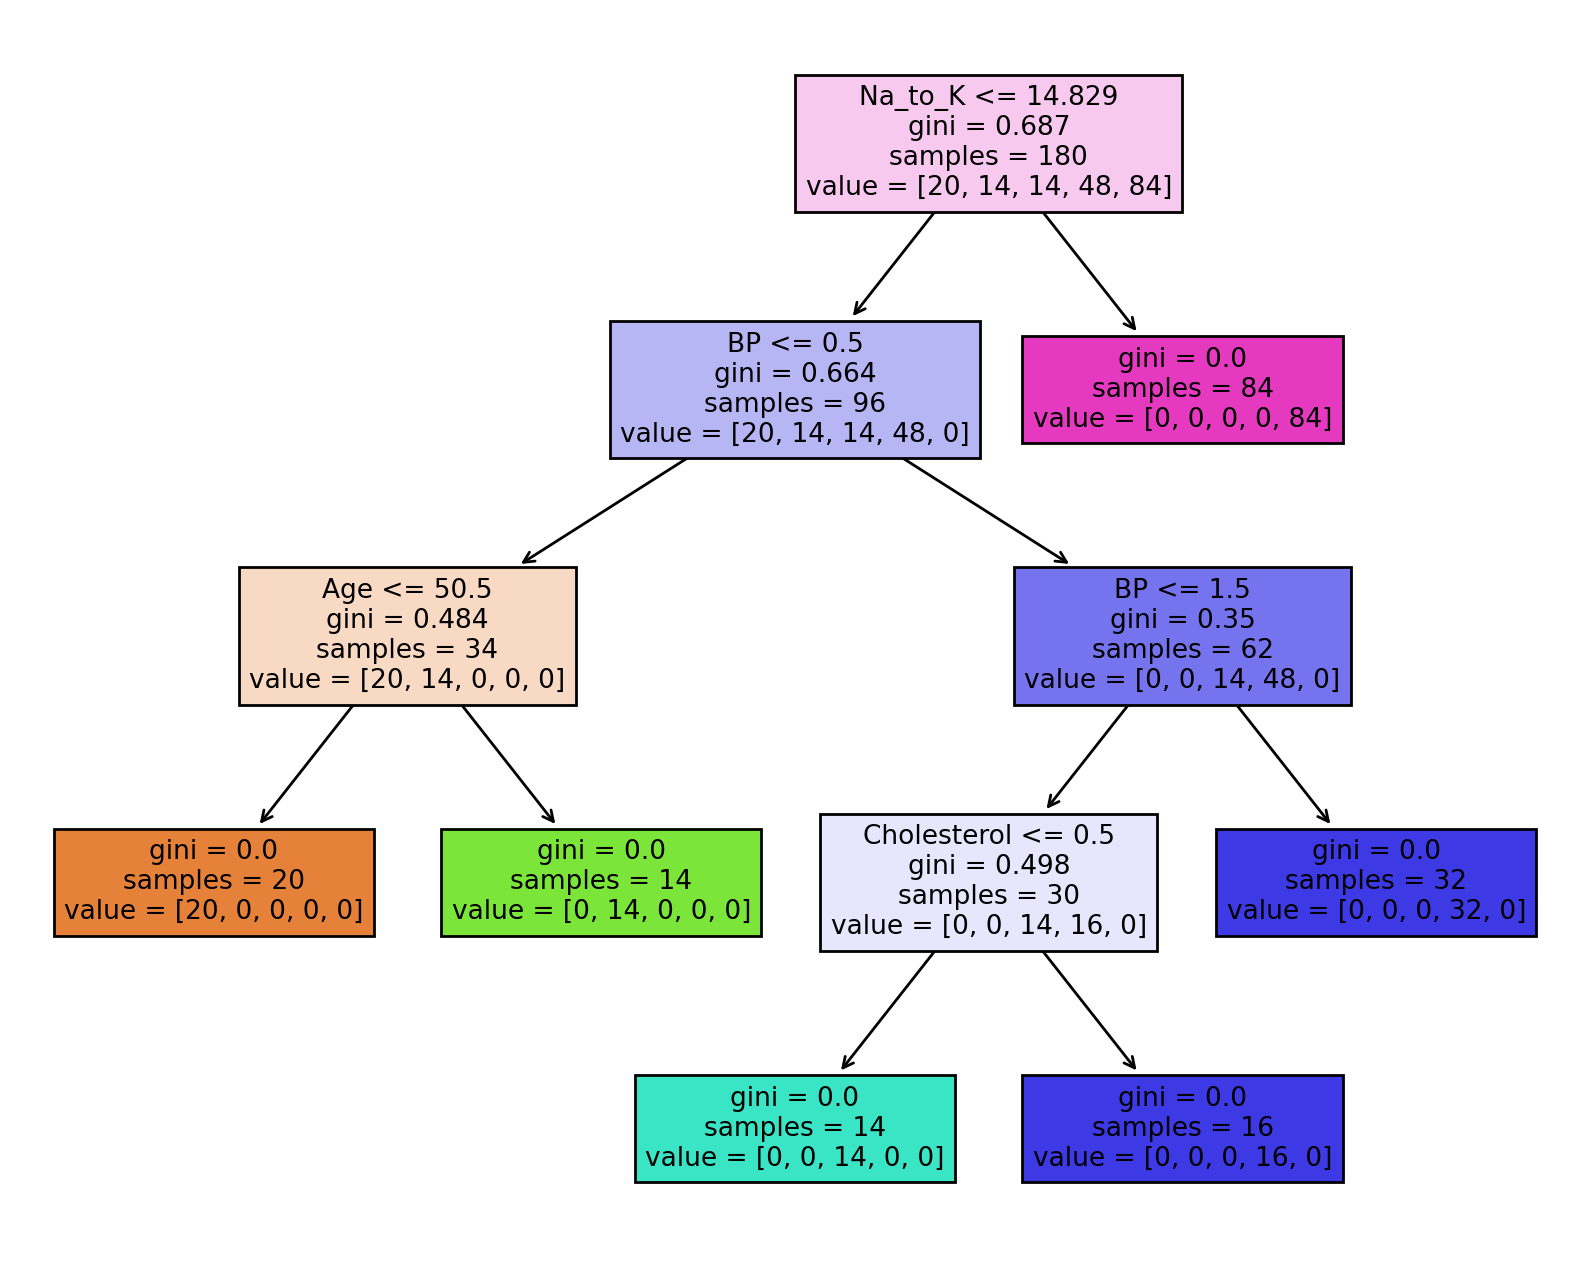

In [61]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8), dpi=200)
plot_tree(tree_clf0, feature_names=drugs.columns, filled=True);


In [62]:
risk = pd.read_csv(r'C:\Users\ACER\Downloads\credit_risk_dataset.csv')
risk.head(4)

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2

In [63]:
risk.shape

(32581, 12)

In [64]:
risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [65]:
risk.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [66]:
risk.describe(include='O')

person_home_ownership loan_intent loan_grade cb_person_default_on_file
count                  32581       32581      32581                     32581
unique                     4           6          7                         2
top                     RENT   EDUCATION          A                         N
freq                   16446        6453      10777                     26836

In [67]:
risk.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

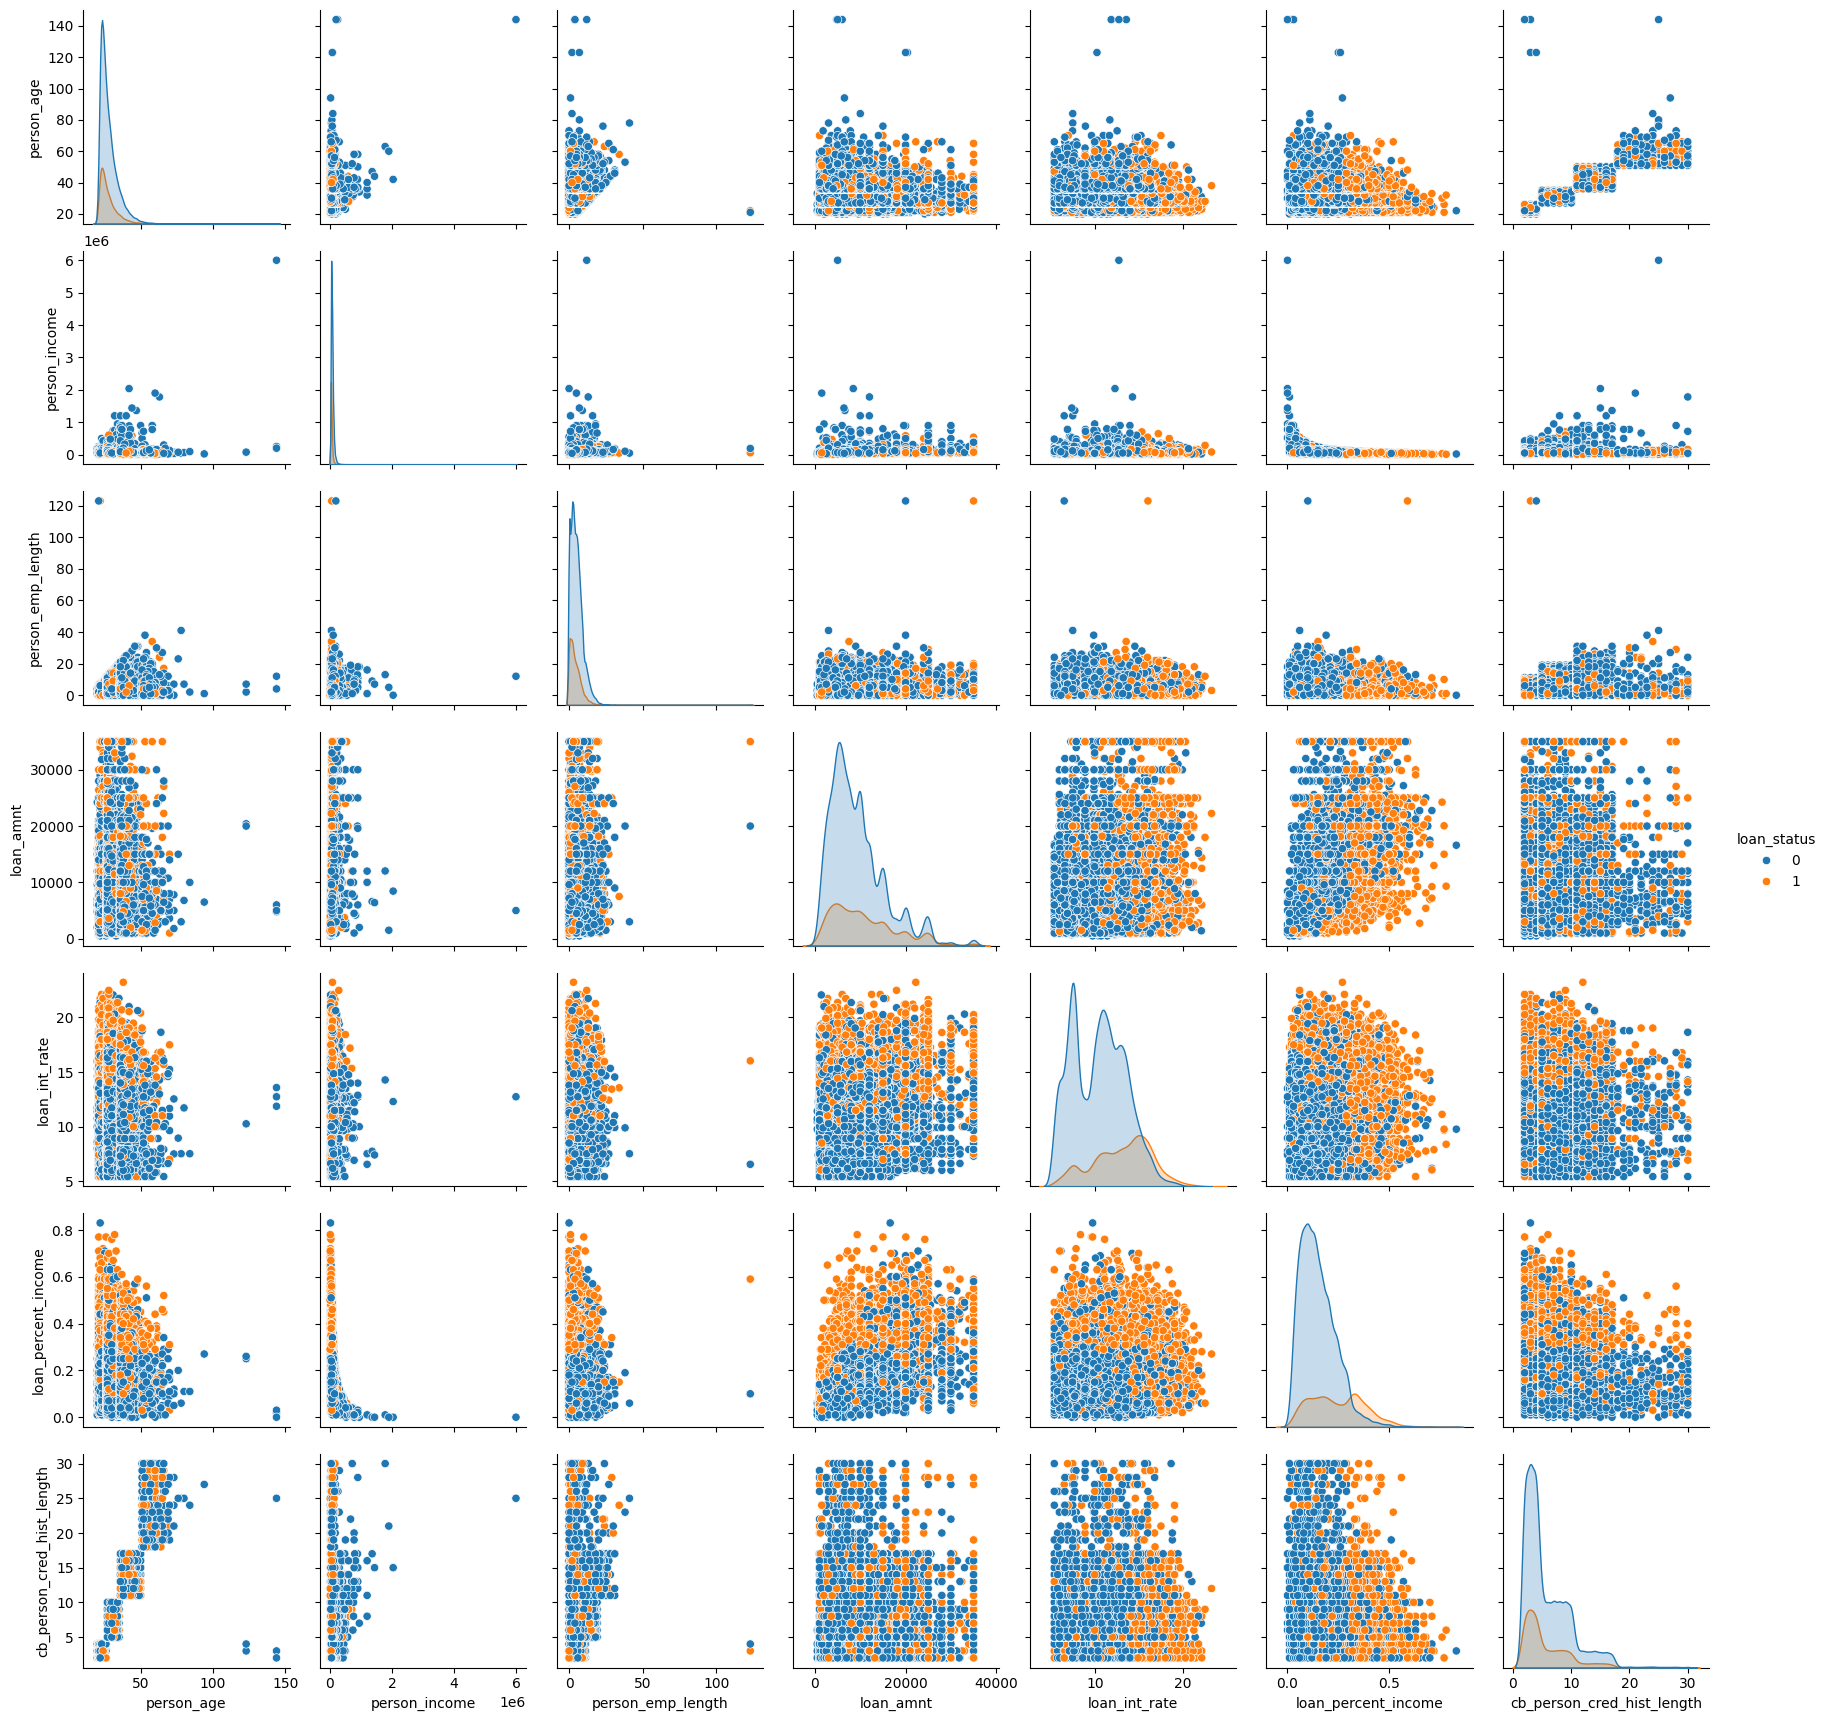

In [68]:
'''
person_emp_length              895  /32581
loan_int_rate                 3116  /32581
'''
 
sns.pairplot(data=risk, hue='loan_status')

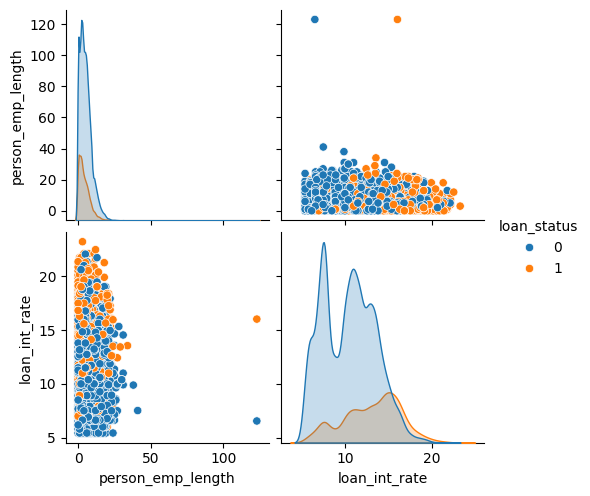

In [69]:
sns.pairplot(data=risk[['person_emp_length', 'loan_int_rate', 'loan_status']], hue='loan_status')

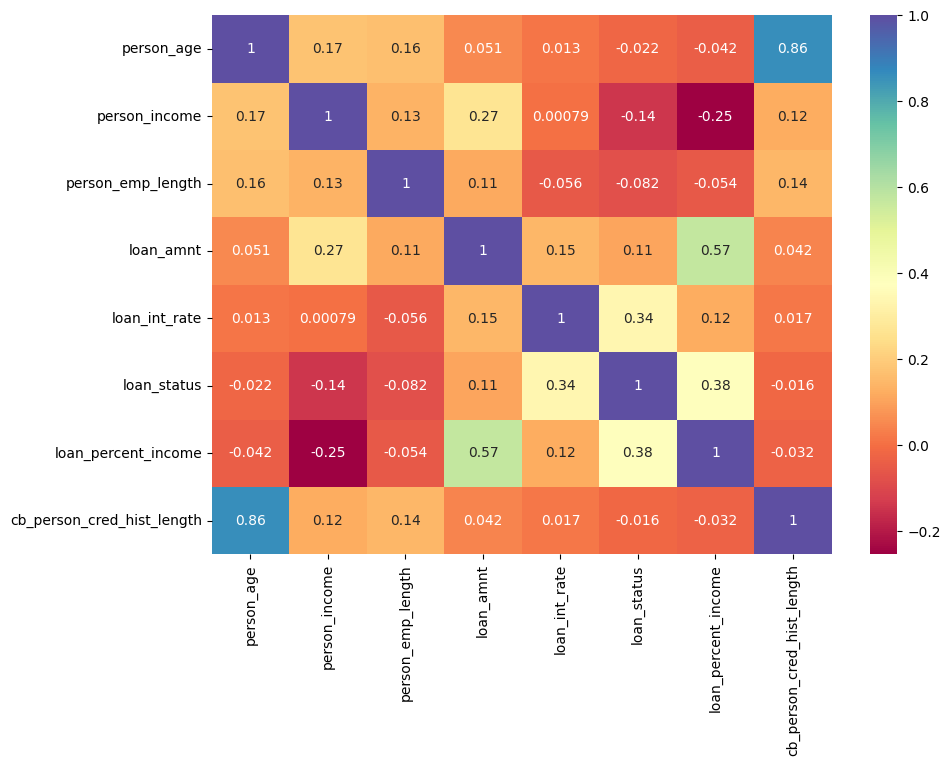

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_risk = risk.select_dtypes(include='number')

correlation = numeric_risk.corr()

plt.figure(figsize=(10, 7))
corr_map = sns.heatmap(correlation, annot=True, cmap="Spectral")

plt.show()


'\nnp.ones_like(correlation, dtype=bool) creates a boolean matrix of the same shape as correlation.\nIt sets all elements to True initially because we\'re going to use this as a mask.\n\nnp.triu(...) stands for "upper triangle" and is a NumPy function that zeros out (sets to False) all \nthe elements below the main diagonal of the matrix. In other words, it keeps only the upper triangle intact. \n\n1 2 3\n4 5 6\n7 8 9\n\nApplying np.triu(...) would give you:\n\n1 2 3\n0 5 6\n0 0 9\n'

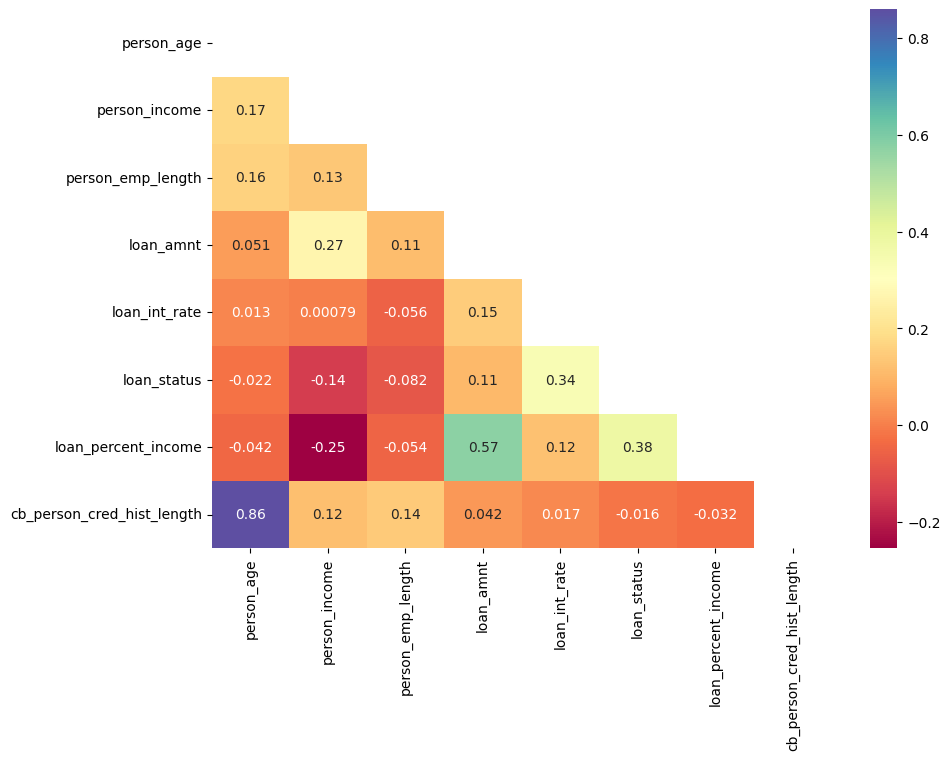

In [71]:
mask_up = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(10,7))
sns.heatmap(correlation, cmap='Spectral', mask=mask_up, annot=True)
'''
np.ones_like(correlation, dtype=bool) creates a boolean matrix of the same shape as correlation.
It sets all elements to True initially because we're going to use this as a mask.

np.triu(...) stands for "upper triangle" and is a NumPy function that zeros out (sets to False) all 
the elements below the main diagonal of the matrix. In other words, it keeps only the upper triangle intact. 

1 2 3
4 5 6
7 8 9

Applying np.triu(...) would give you:

1 2 3
0 5 6
0 0 9
'''

In [72]:
'''
person_emp_length              895  /32581
loan_int_rate                 3116  /32581
'''
risk.person_emp_length.value_counts()

person_emp_length
0.0      4105
2.0      3849
3.0      3456
5.0      2946
1.0      2915
4.0      2874
6.0      2666
7.0      2196
8.0      1687
9.0      1367
11.0      740
10.0      696
12.0      575
13.0      426
14.0      335
15.0      238
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64

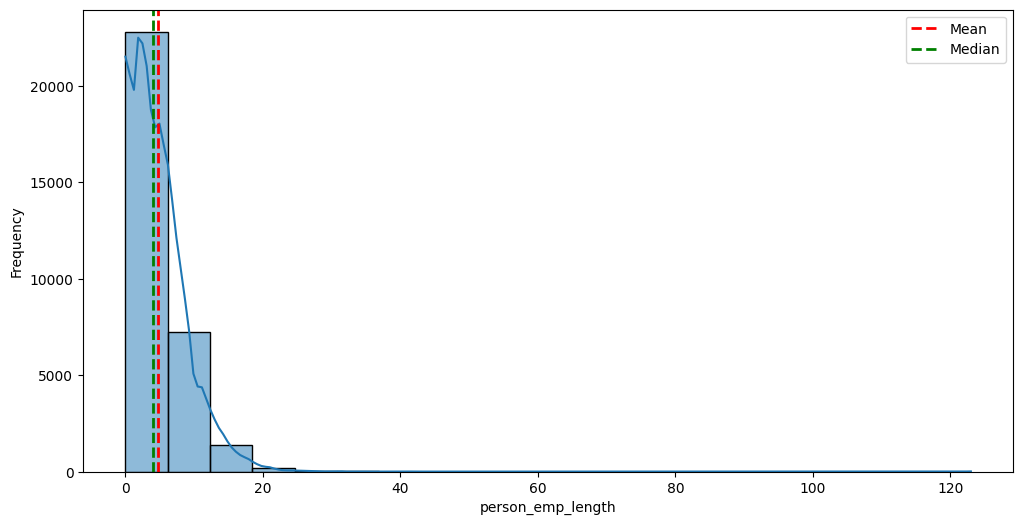

In [73]:
plt.figure(figsize=(12, 6))
sns.histplot(risk['person_emp_length'].dropna(), bins=20, kde=True)
mean_value = risk['person_emp_length'].mean()
median_value = risk['person_emp_length'].median()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median')

plt.xlabel('person_emp_length')
plt.ylabel('Frequency')
plt.legend()


In [74]:
risk['person_emp_length'].fillna(risk['person_emp_length'].median(), inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_19216\311348314.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  risk['person_emp_length'].fillna(risk['person_emp_length'].median(), inplace=True)


In [75]:
risk.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

11.011694892245036 10.99


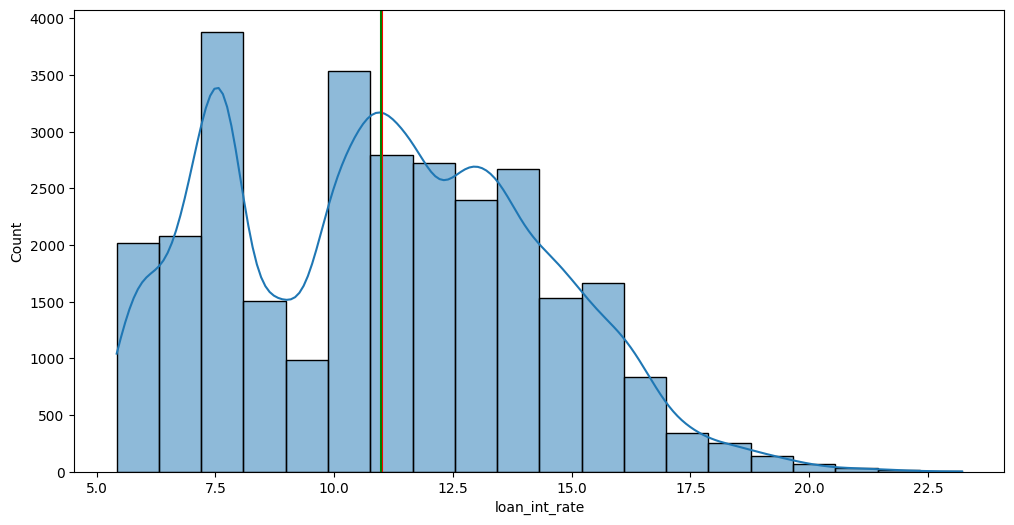

In [76]:
plt.figure(figsize=(12, 6))
sns.histplot(risk['loan_int_rate'].dropna(), bins=20, kde=True)

mean, median = risk['loan_int_rate'].mean(), risk['loan_int_rate'].median()

plt.axvline(mean, color='red')
plt.axvline(median, color ='green')

print(mean, median)


In [77]:
risk['loan_int_rate'].fillna(risk['loan_int_rate'].mean(), inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_19216\667424116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  risk['loan_int_rate'].fillna(risk['loan_int_rate'].mean(), inplace=True)


In [78]:
risk.isnull().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [79]:
risk.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   person_home_ownership      32581 non-null  object
 1   loan_intent                32581 non-null  object
 2   loan_grade                 32581 non-null  object
 3   cb_person_default_on_file  32581 non-null  object
dtypes: object(4)
memory usage: 1018.3+ KB


In [80]:
cols = risk.select_dtypes(include='O').columns
cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [81]:
for col in cols:
    print("="*50, col)
    print(risk[col].value_counts())


================================================== person_home_ownership
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
================================================== loan_intent
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
================================================== loan_grade
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
================================================== cb_person_default_on_file
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


In [82]:
lenc = LabelEncoder()
for col in cols:
    
    risk[col] = lenc.fit_transform(risk[col])


risk

person_age  person_income  person_home_ownership  person_emp_length  \
0              22          59000                      3              123.0   
1              21           9600                      2                5.0   
2              25           9600                      0                1.0   
3              23          65500                      3                4.0   
4              24          54400                      3                8.0   
...           ...            ...                    ...                ...   
32576          57          53000                      0                1.0   
32577          54         120000                      0                4.0   
32578          65          76000                      3                3.0   
32579          56         150000                      0                5.0   
32580          66          42000                      3                2.0   

       loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0                4           3      35000          16.02            1   
1                1           1       1000          11.14            0   
2                3           2       5500          12.87            1   
3                3           2      35000          15.23            1   
4                3           2      35000          14.27            1   
...            ...         ...        ...            ...          ...   
32576            4           2       5800          13.16            0   
32577            4           0      17625           7.49            0   
32578            2           1      35000          10.99            1   
32579            4           1      15000          11.48            0   
32580            3           1       6475           9.99            0   

       loan_percent_income  cb_person_default_on_file  \
0                     0.59                          1   
1                     0.10                          0   
2                     0.57                          0   
3                     0.53                          0   
4                     0.55                          1   
...                    ...                        ...   
32576                 0.11                          0   
32577                 0.15                          0   
32578                 0.46                          0   
32579                 0.10                          0   
32580                 0.15                          0   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

In [83]:
risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int32  
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  int32  
 5   loan_grade                  32581 non-null  int32  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int32  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 2.5 MB


In [84]:
X = risk.drop(columns='loan_status')
y = risk['loan_status']

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [86]:
tree_clf1 = DTC()
tree_clf1.fit(X_train, y_train)


DecisionTreeClassifier()

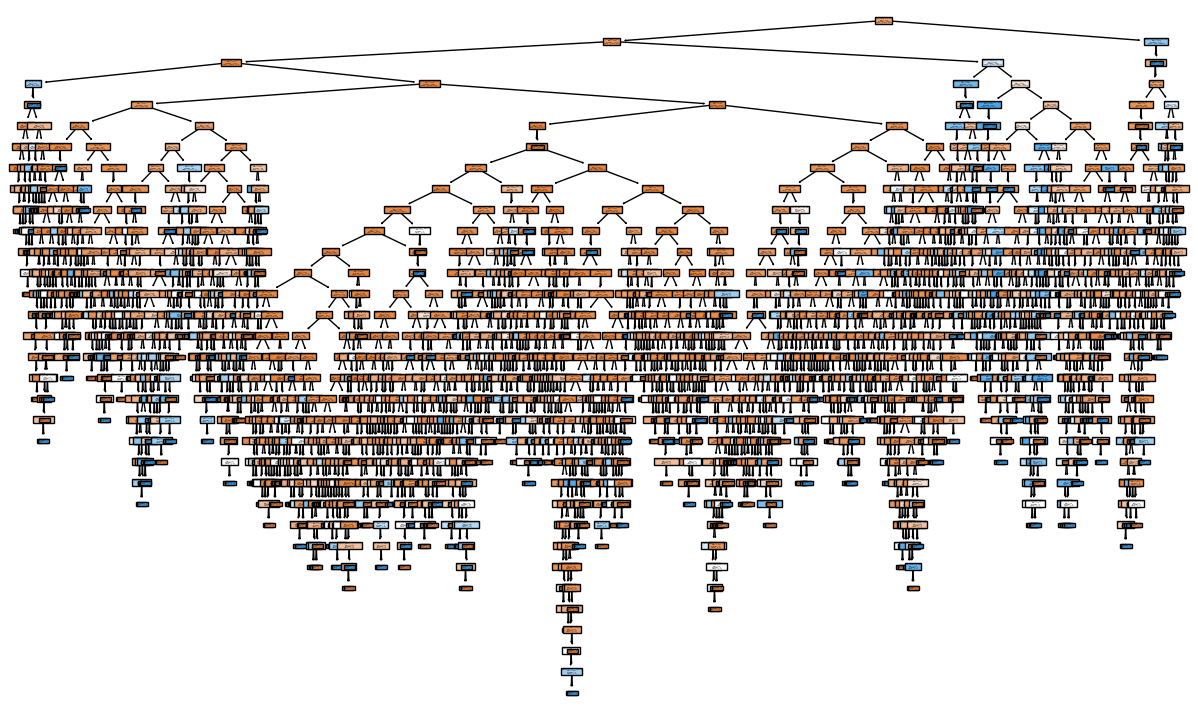

In [87]:
plt.figure(figsize=(15, 9))
plot_tree(tree_clf1, feature_names=risk.columns, filled=True);

In [88]:

tree_clf1.get_depth()

32

In [89]:

tree_clf1.get_n_leaves()

2006

In [90]:
features = tree_clf1.feature_names_in_
features

array(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype=object)

In [91]:
importance = tree_clf1.feature_importances_
importance

array([0.04272029, 0.13382315, 0.1435721 , 0.05292389, 0.09517938,
       0.16430031, 0.04503734, 0.05392135, 0.23870138, 0.00444597,
       0.02537483])

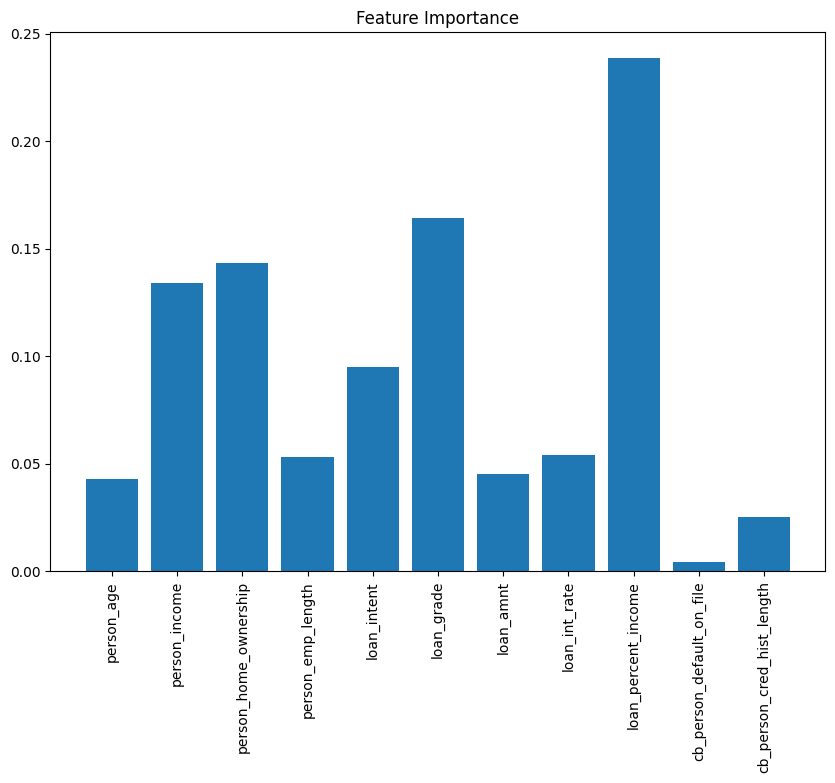

In [92]:
plt.figure(figsize=(10,7))
plt.bar(features, importance)
plt.title('Feature Importance')
plt.xticks(rotation=90);

In [93]:
tree_clf1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [94]:
print(f"Training accuracy : {tree_clf1.score(X_train, y_train)}")
print(f"Test accuracy {tree_clf1.score(X_test, y_test)}")

Training accuracy : 1.0
Test accuracy 0.886854219948849


In [95]:
path = tree_clf1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
models = []
for i, ccp_alpha in enumerate(ccp_alphas):
    model = DTC(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    print(f"Accuracy with pruning #{i+1}:", model.score(X_test, y_test))
    models.append(model)

Accuracy with pruning #1: 0.8864450127877238
Accuracy with pruning #2: 0.8864450127877238
Accuracy with pruning #3: 0.8866496163682864
Accuracy with pruning #4: 0.8866496163682864
Accuracy with pruning #5: 0.887468030690537
Accuracy with pruning #6: 0.887468030690537
Accuracy with pruning #7: 0.8875703324808184
Accuracy with pruning #8: 0.8875703324808184
Accuracy with pruning #9: 0.8875703324808184
Accuracy with pruning #10: 0.8875703324808184
Accuracy with pruning #11: 0.8875703324808184
Accuracy with pruning #12: 0.8878772378516624
Accuracy with pruning #13: 0.8879795396419438
Accuracy with pruning #14: 0.8879795396419438
Accuracy with pruning #15: 0.8879795396419438
Accuracy with pruning #16: 0.888081841432225
Accuracy with pruning #17: 0.8882864450127878
Accuracy with pruning #18: 0.8882864450127878
Accuracy with pruning #19: 0.888388746803069
Accuracy with pruning #20: 0.888388746803069
Accuracy with pruning #21: 0.888388746803069
Accuracy with pruning #22: 0.888388746803069
Accu

Model 0


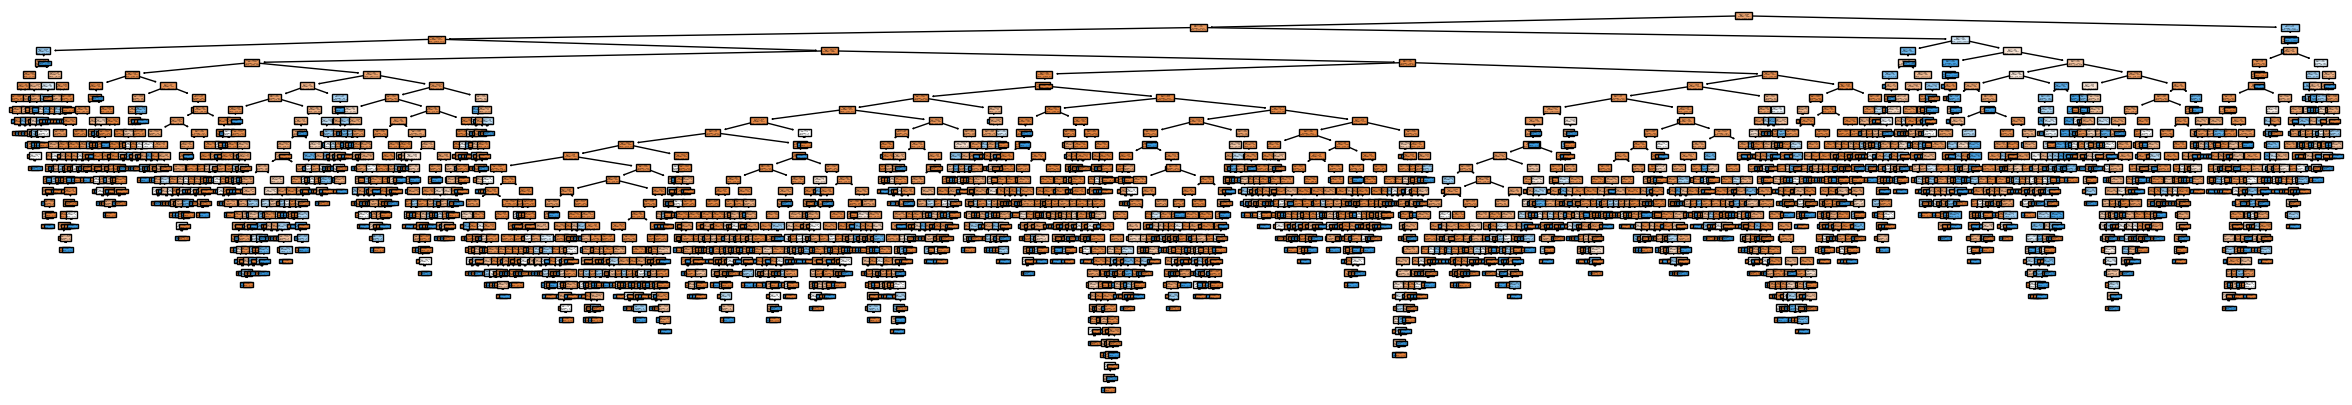

Model 50


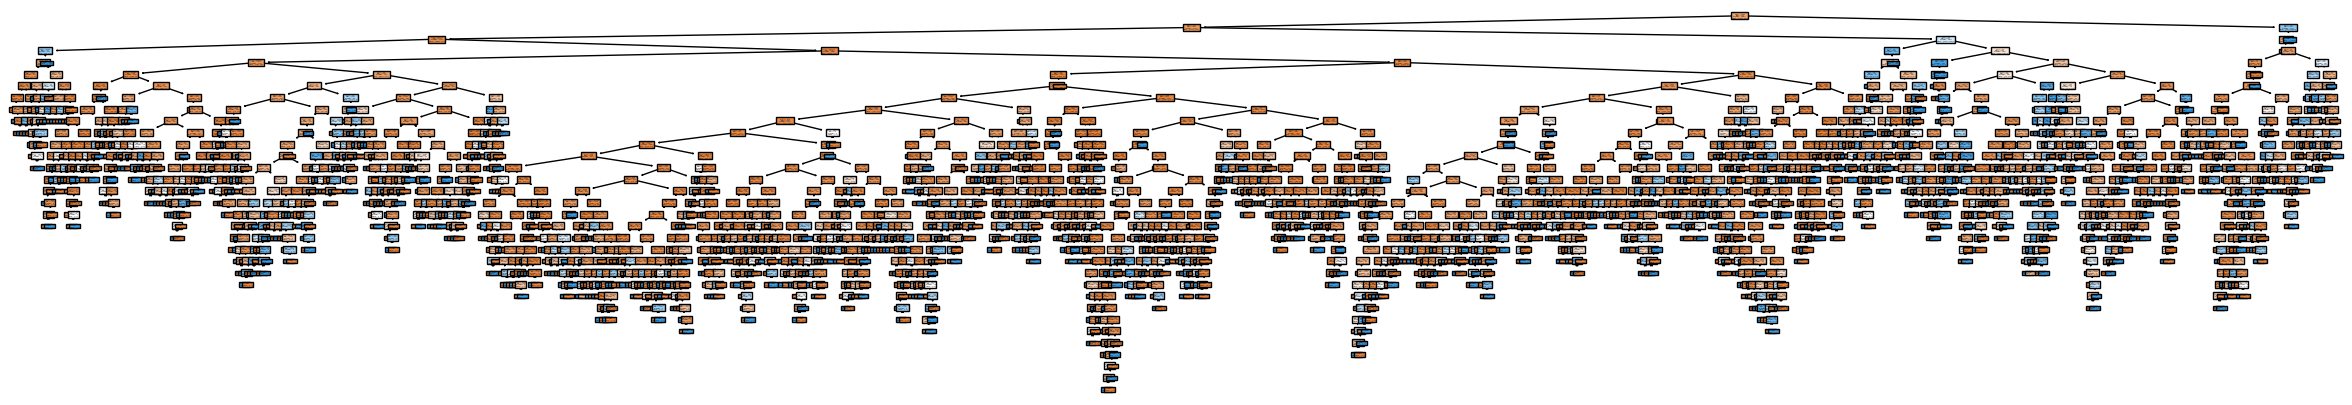

Model 100


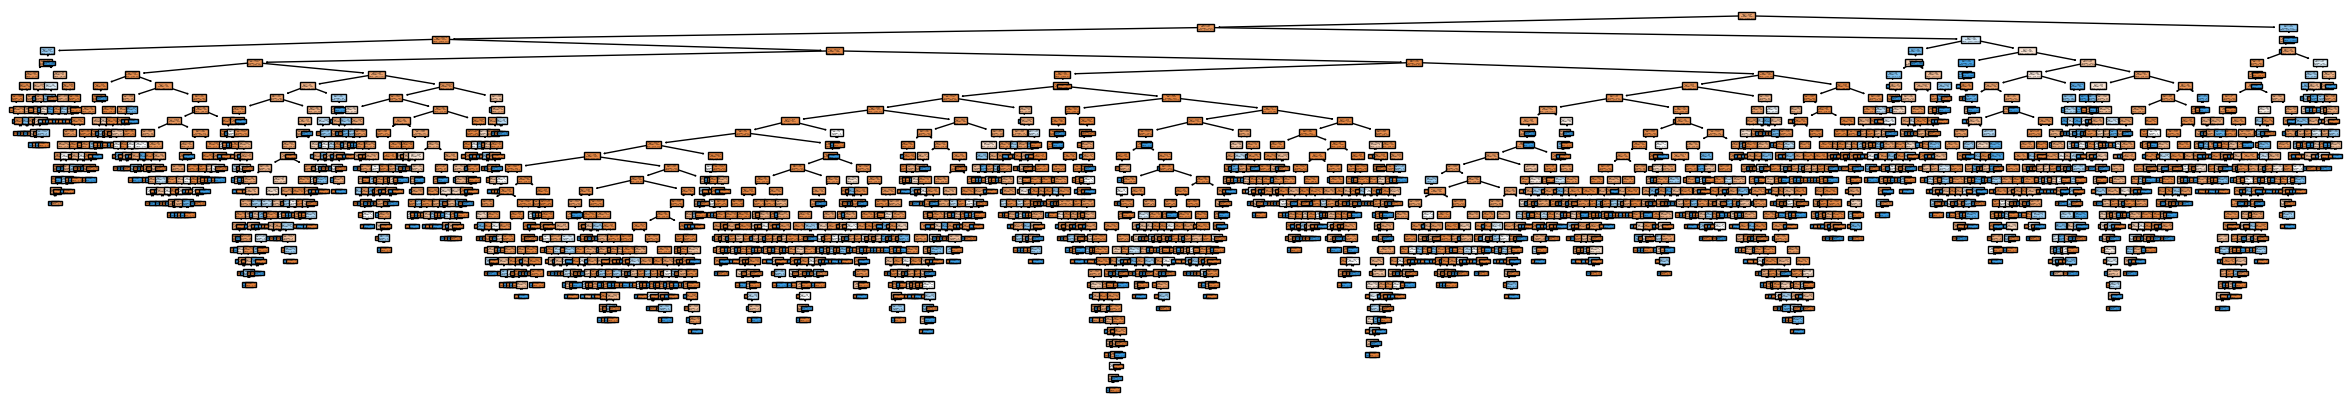

Model 200


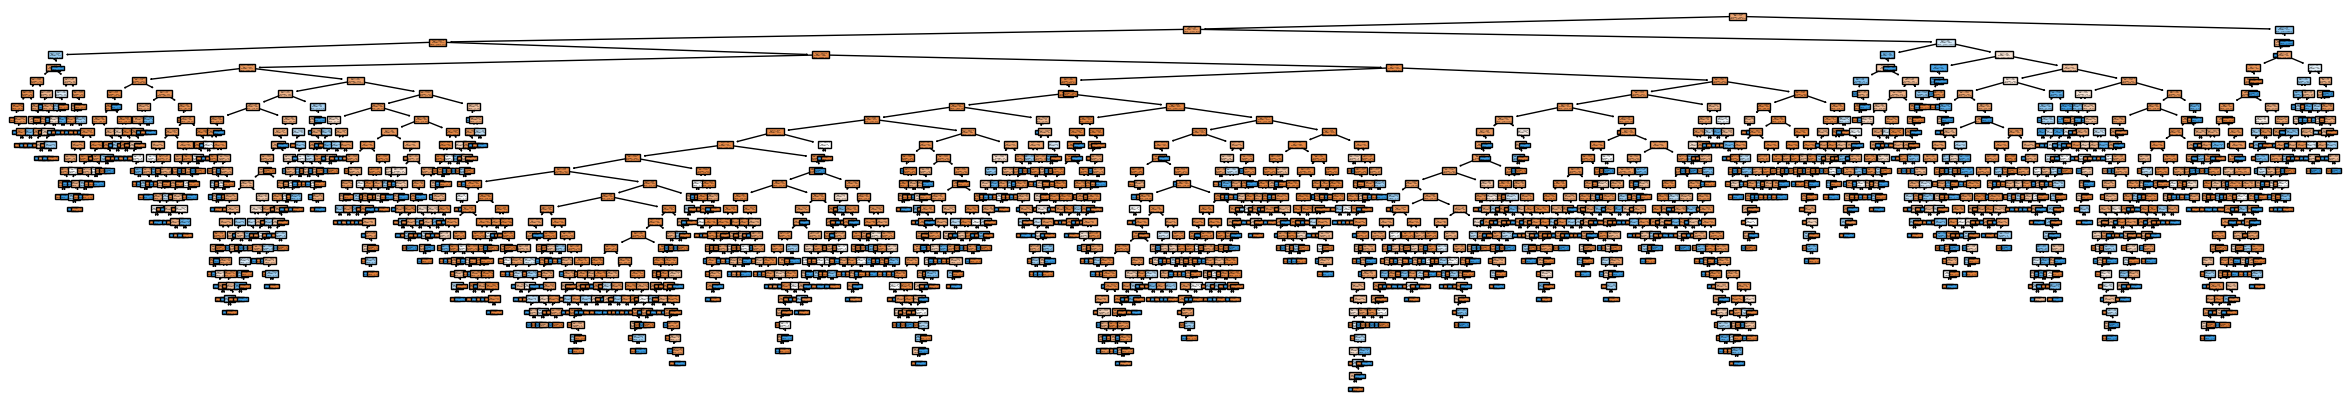

Model 300


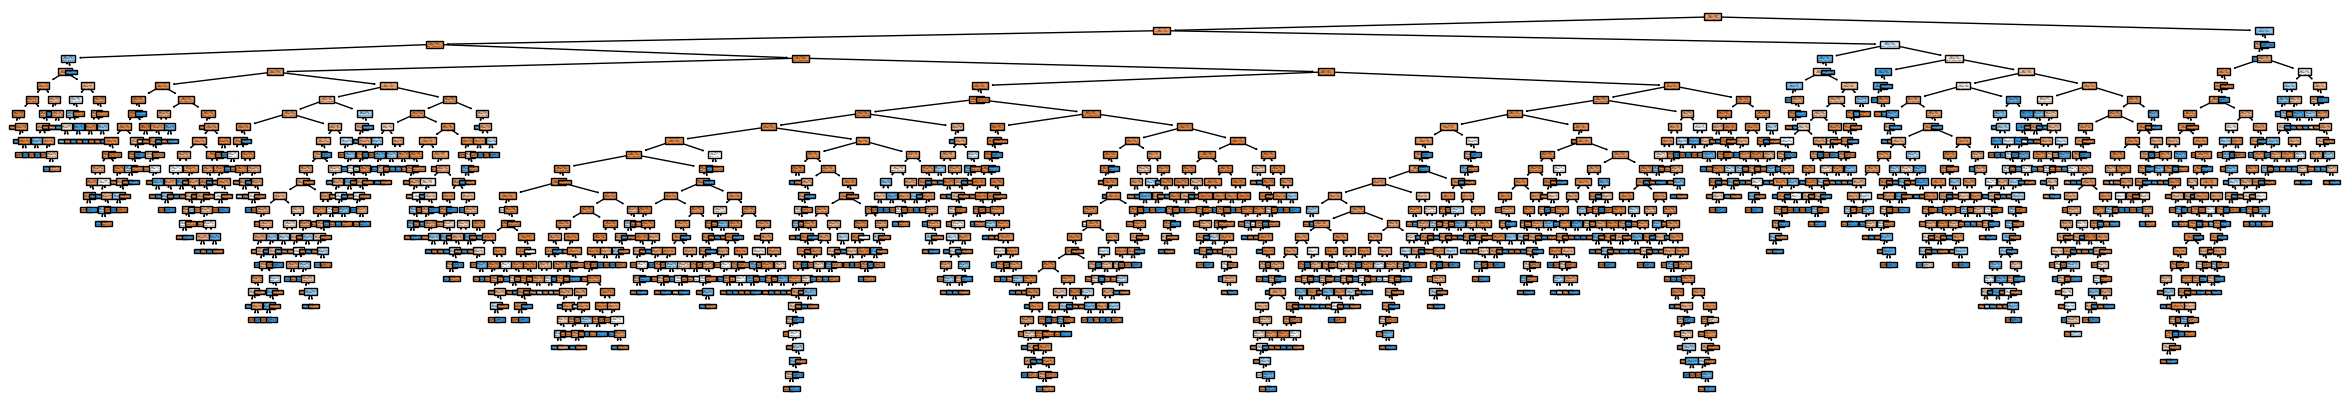

Model 400


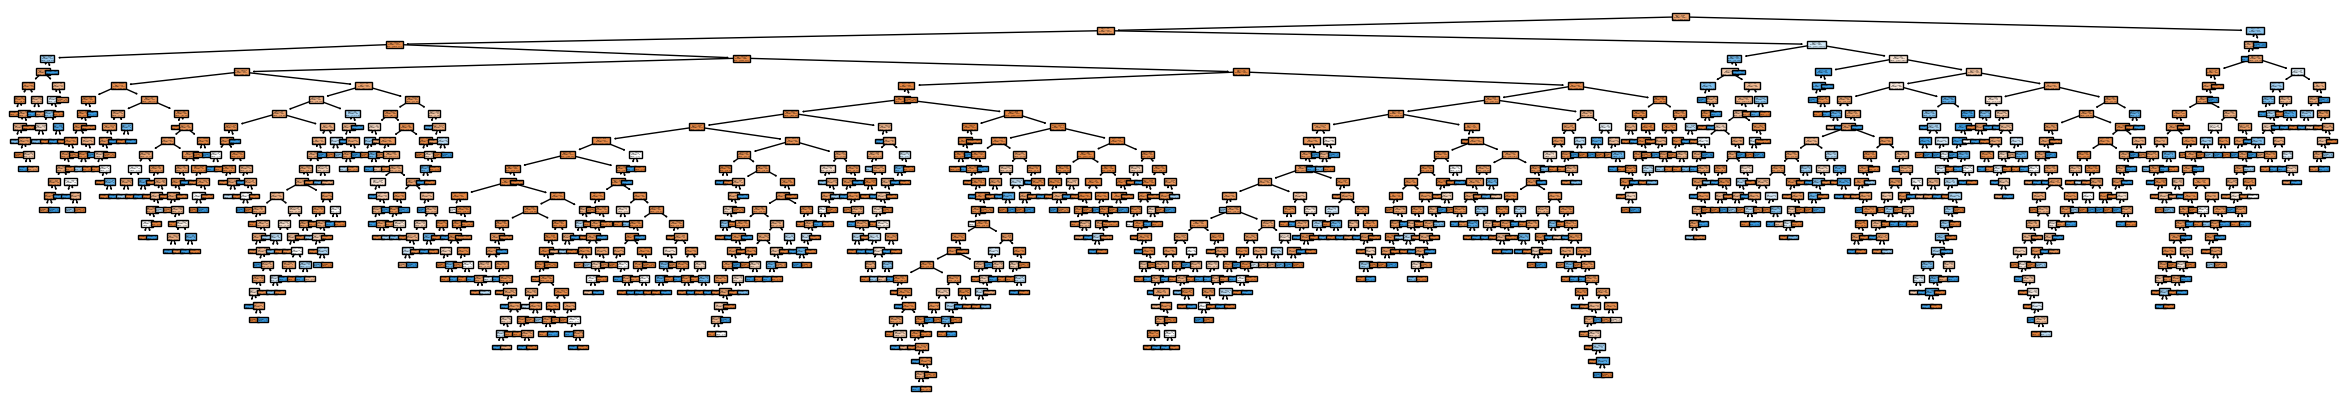

Model 500


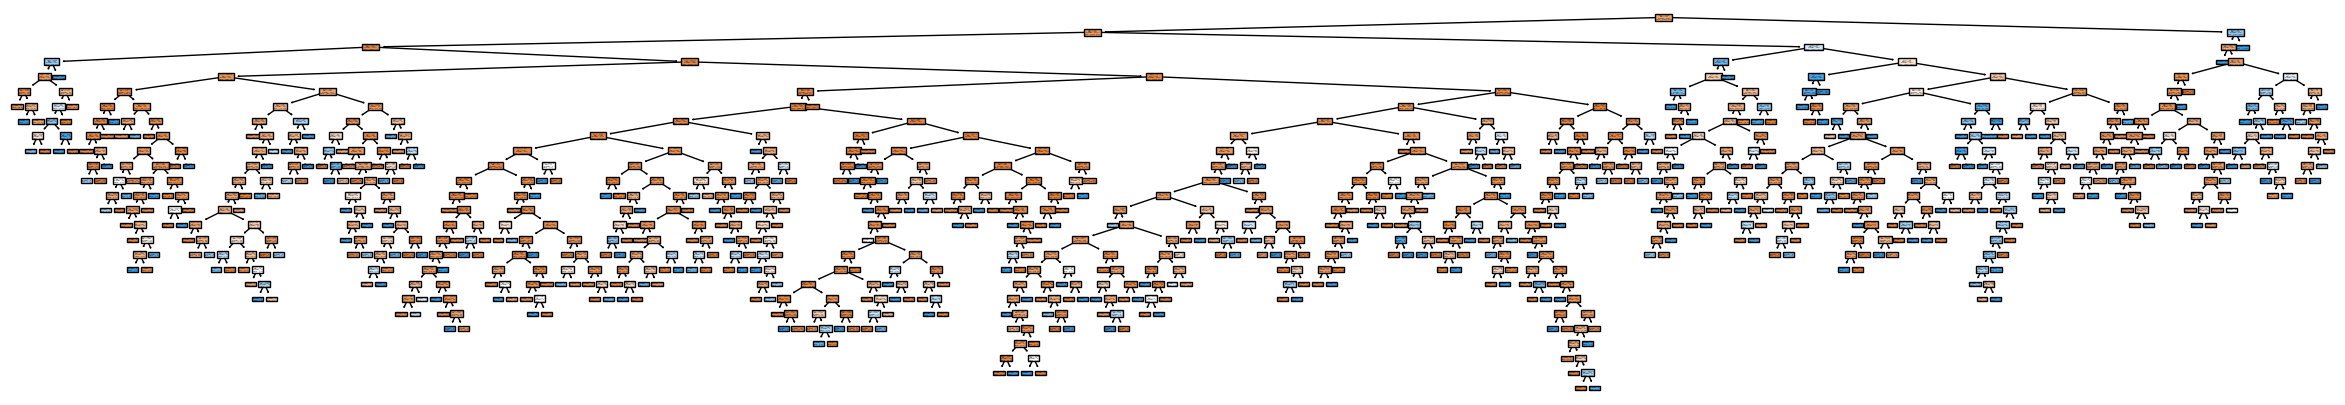

Model 600


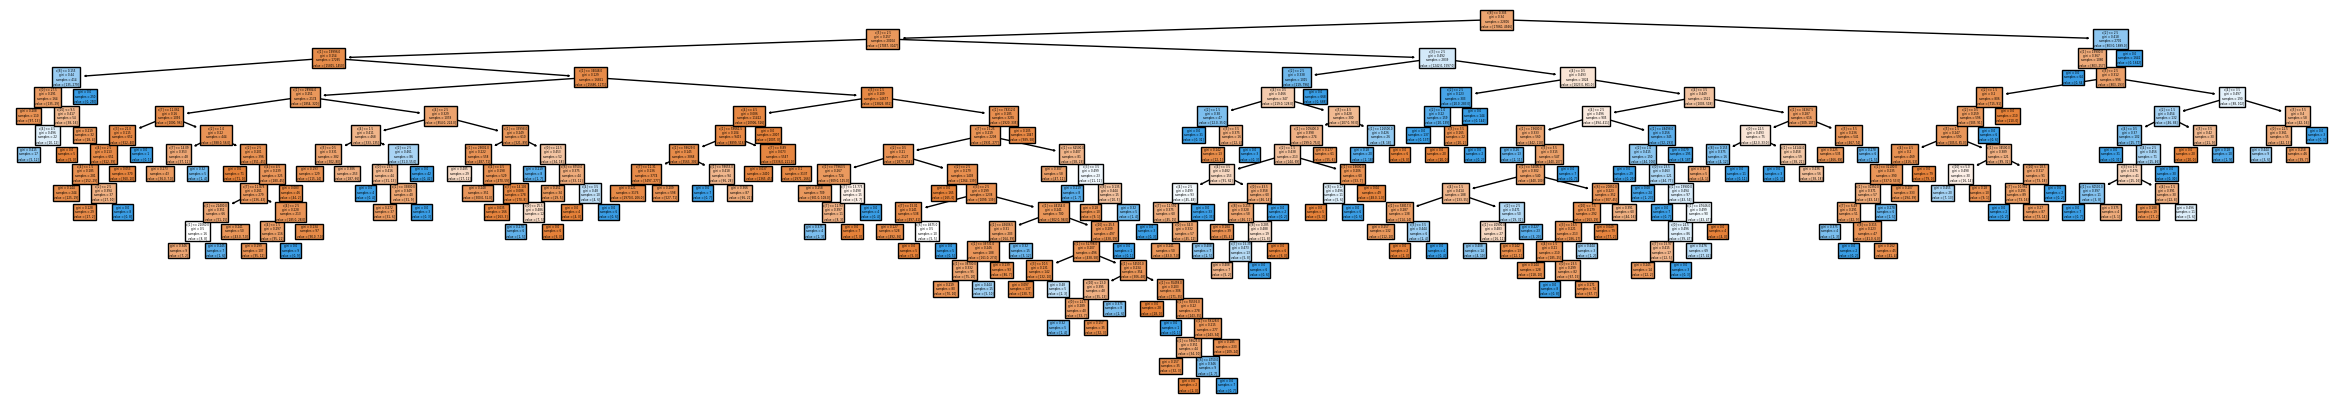

Model 620


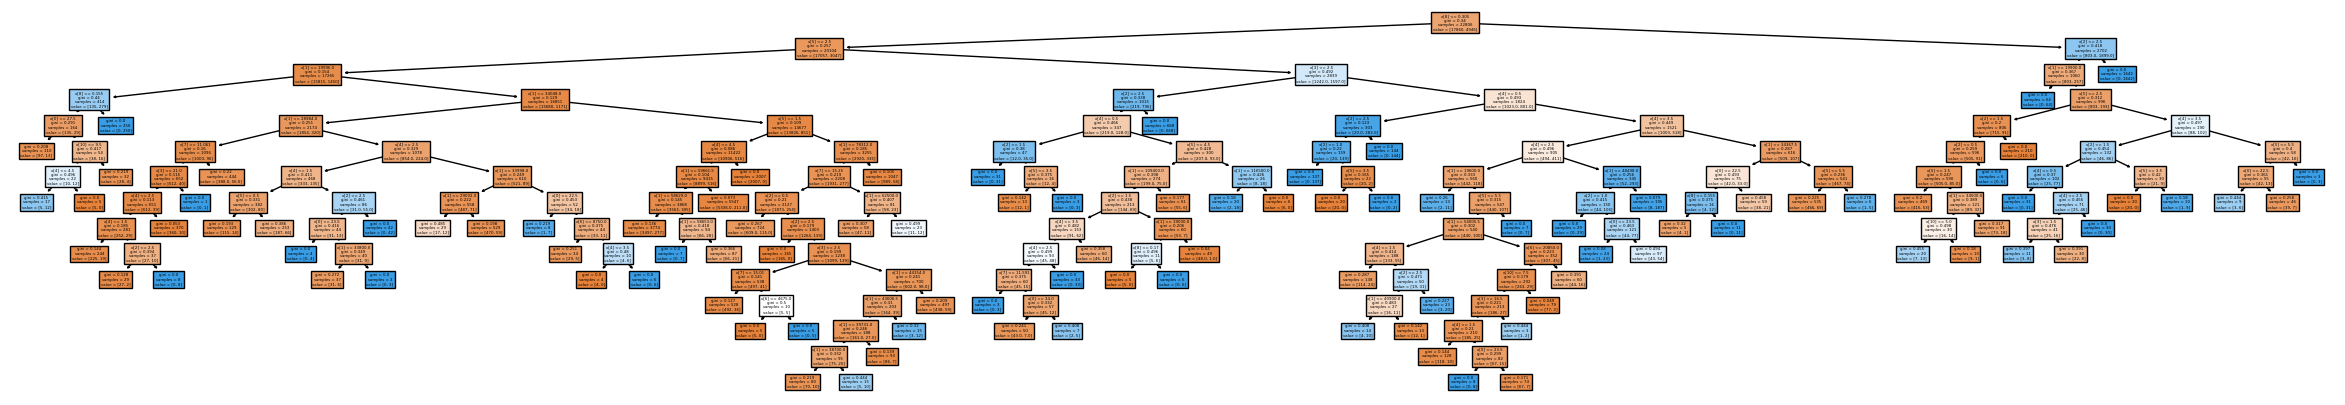

Model 680 does not exist in the models list.
Model 682 does not exist in the models list.


In [99]:
# Assuming you have imported necessary libraries and created models

hoosen_models = [0, 50, 100, 200, 300, 400, 500, 600, 620, 680, 682]

for m in hoosen_models:
    if m < len(models):
        plt.figure(figsize=(30, 5))
        print(f"Model {m}")
        plot_tree(models[m], filled=True)  # Assuming you have a list of models named 'models'
        plt.show()
    else:
        print(f"Model {m} does not exist in the models list.")


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

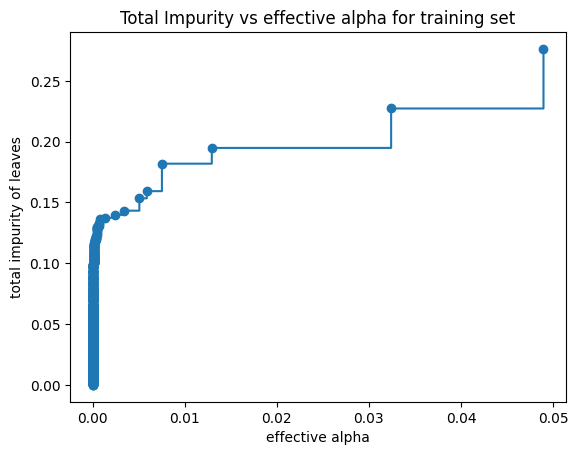

In [100]:
path = tree_clf1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

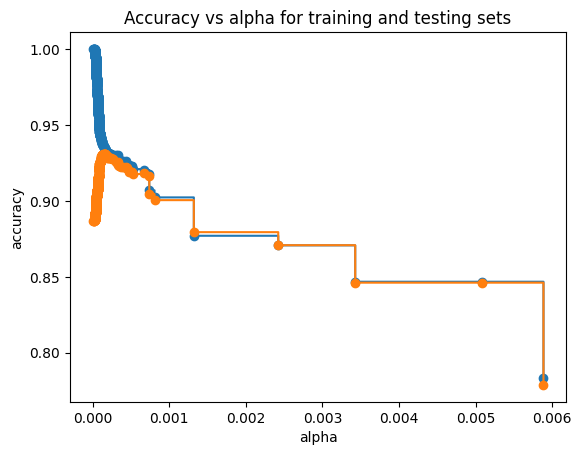

In [107]:
train_scores = [clf.score(X_train, y_train) for clf in models]
test_scores = [clf.score(X_test, y_test) for clf in models]

fig, ax = plt.subplots()

# Set labels and title
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")

# Plot the accuracy scores for the training set against ccp_alphas
ax.plot(ccp_alphas[:len(train_scores)], train_scores, marker="o", label="train", drawstyle="steps-post")

# Plot the accuracy scores for the testing set against ccp_alphas
ax.plot(ccp_alphas[:len(test_scores)], test_scores, marker="o", label="test", drawstyle="steps-post")

In [108]:
tree_clf2 = DTC(ccp_alpha=0.001)

tree_clf2.fit(X_train, y_train)

tree_clf2.score(X_train, y_train), tree_clf2.score(X_test, y_test)

(0.9208980092957993, 0.9176470588235294)

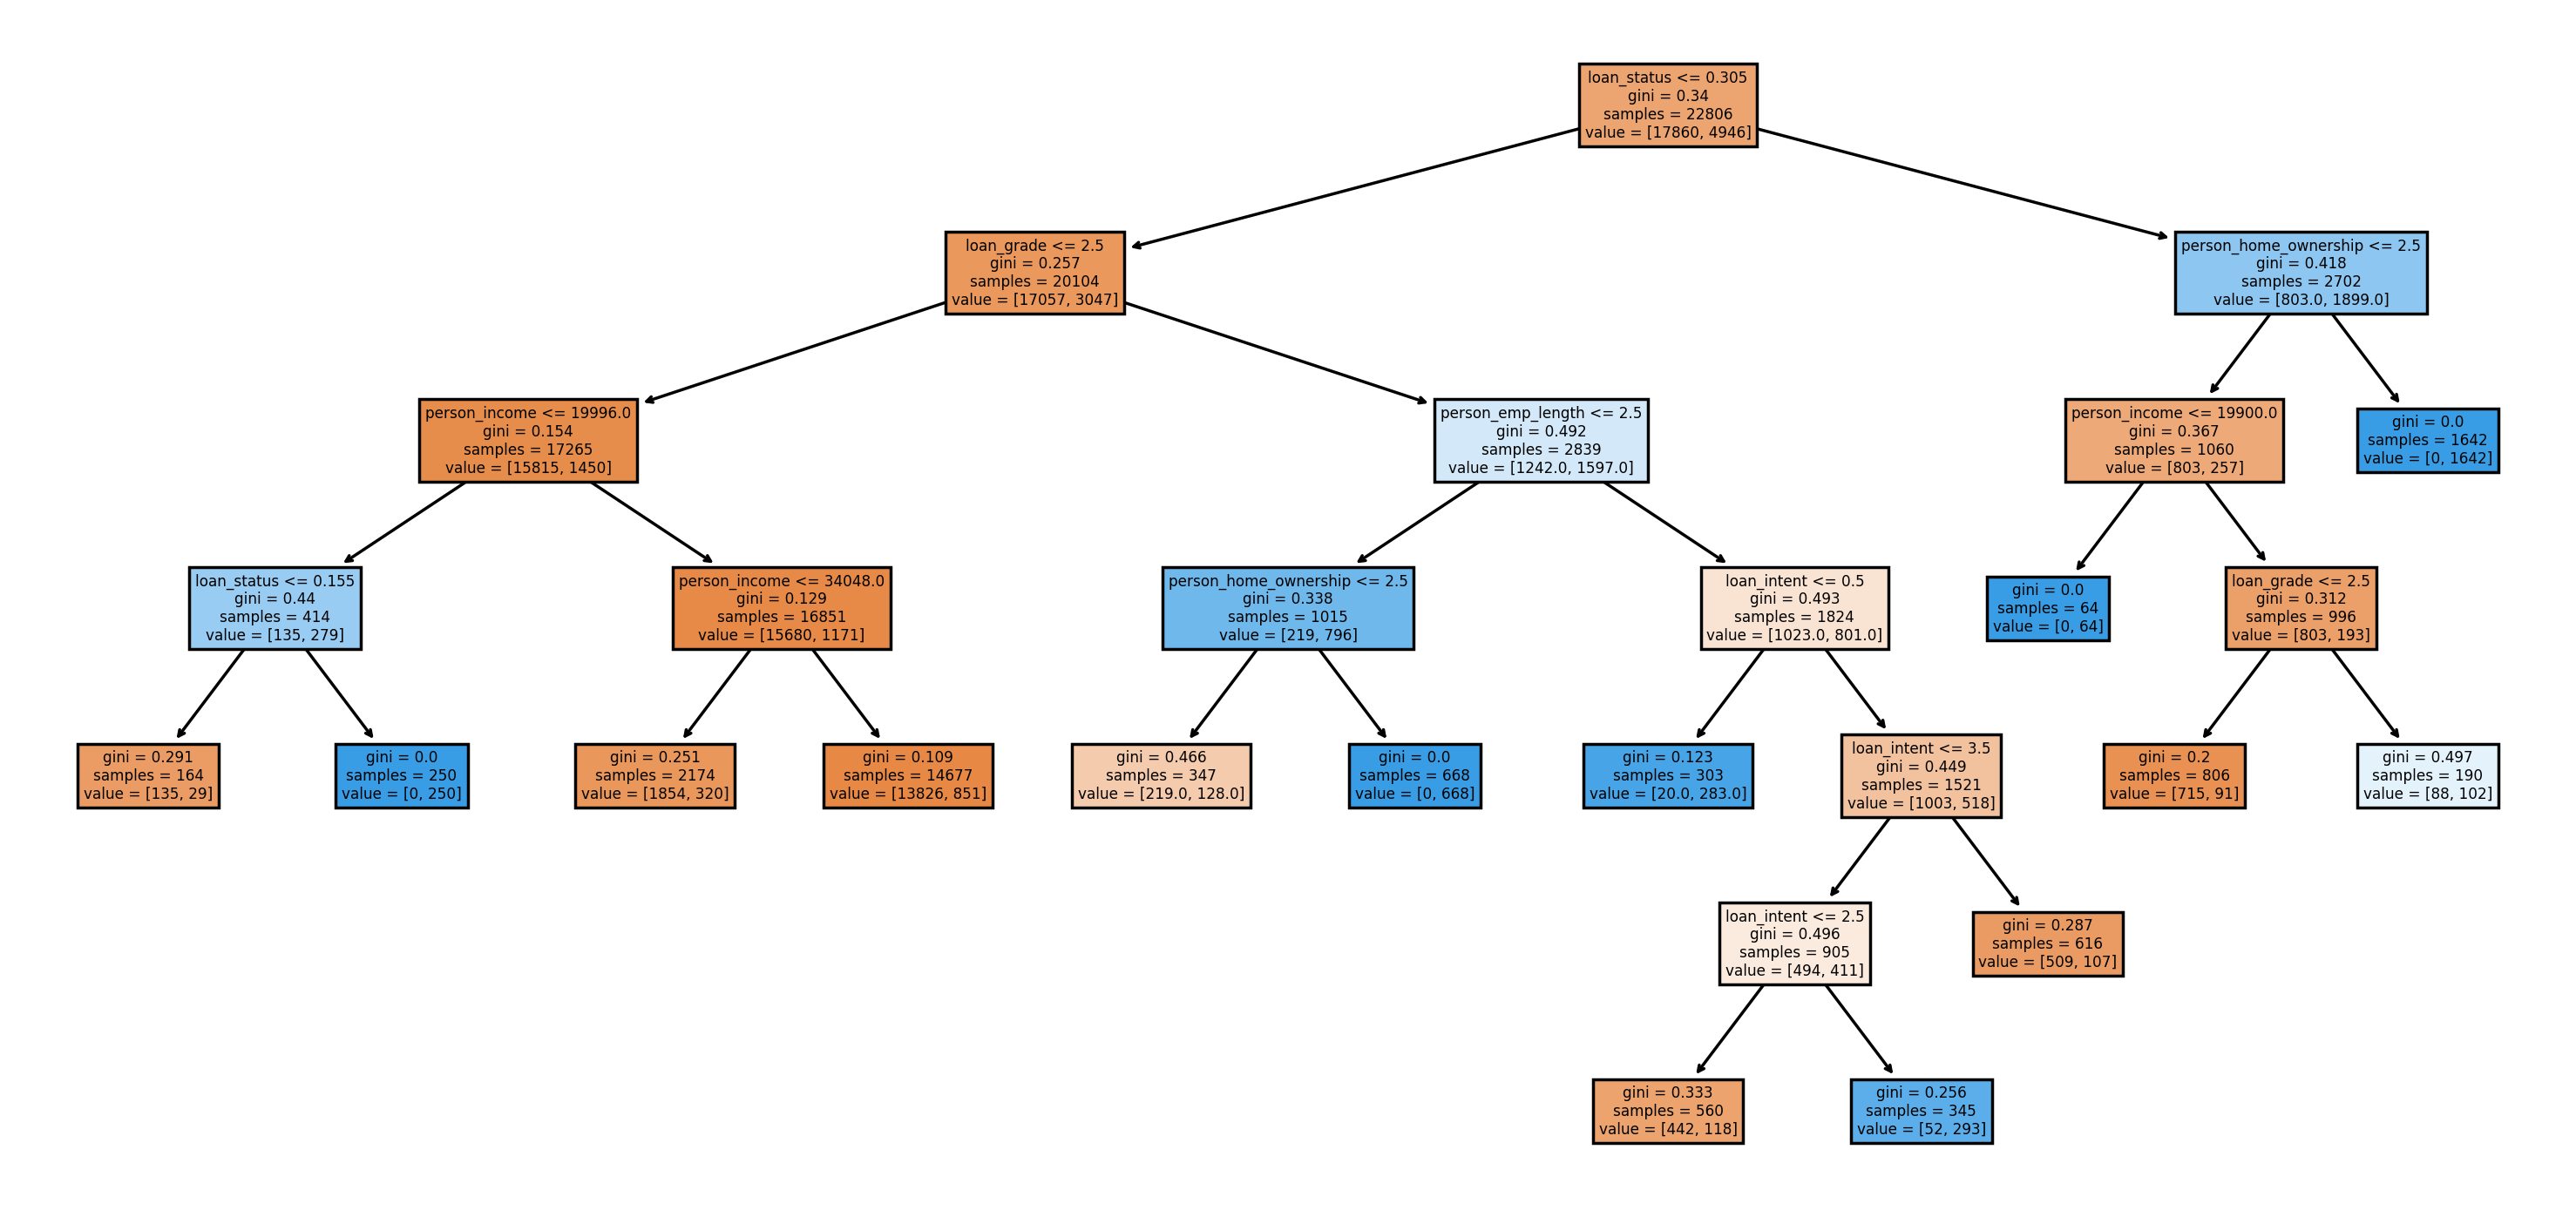

In [109]:
plt.figure(figsize=(15, 7), dpi=250)
plot_tree(tree_clf2, feature_names=risk.columns, filled=True);

In [110]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(tree_clf1, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.88601491 0.88708617 0.88511291 0.88094716 0.88182416]
Mean CV Score: 0.8841970613941793


In [111]:
cv_scores = cross_val_score(tree_clf2, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.92371767 0.92479719 0.91690419 0.92370094 0.91778119]
Mean CV Score: 0.9213802360154488


In [112]:
DTC?

Init signature:
DTC(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum de

In [113]:
tree_clf3 = DTC(max_depth=10)
tree_clf3.fit(X_train, y_train)
cv_scores = cross_val_score(tree_clf3, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

print("Test Score", tree_clf3.score(X_test, y_test))


Cross-Validation Scores: [0.9267865  0.9269897  0.92326244 0.92172769 0.92348169]
Mean CV Score: 0.9244496037493029
Test Score 0.9249104859335039


In [114]:
y_pred = tree_clf3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7613
           1       0.94      0.71      0.81      2162

    accuracy                           0.92      9775
   macro avg       0.93      0.85      0.88      9775
weighted avg       0.93      0.92      0.92      9775



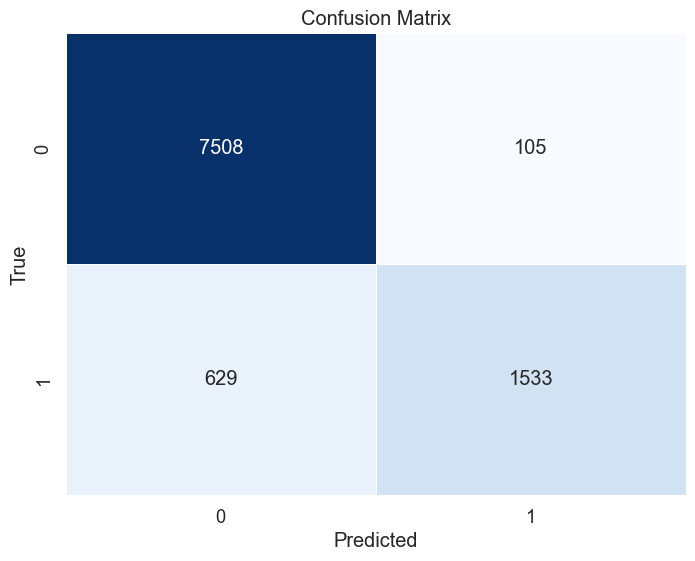

In [115]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size as needed
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [116]:
from sklearn.model_selection import GridSearchCV

tree_clf4 = DTC()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(tree_clf4, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [117]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [118]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [119]:
best_tree = grid_search.best_estimator_

In [120]:
best_tree

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

In [121]:
print(f"train score {best_tree.score(X_train, y_train)}")
print(f"test score {best_tree.score(X_test, y_test)}")

train score 0.9386126457949663
test score 0.9242966751918159


In [122]:
pd.DataFrame(grid_search.cv_results_).sample(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2        0.299700      0.024297         0.015016        0.014203   
28       0.498101      0.069885         0.013323        0.008254   
6        0.413043      0.146345         0.018221        0.008865   
4        0.292171      0.012108         0.006759        0.001349   
26       0.670191      0.121924         0.035481        0.049151   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
2             None                      1                      10   
28              30                      1                       5   
6             None                      4                       2   
4             None                      2                       5   
26              20                      4                      10   

                                               params  split0_test_score  \
2   {'max_depth': None, 'min_samples_leaf': 1, 'mi...           0.902455   
28  {'max_depth': 30, 'min_samples_leaf': 1, 'min_...           0.889084   
6   {'max_depth': None, 'min_samples_leaf': 4, 'mi...           0.909031   
4   {'max_depth': None, 'min_samples_leaf': 2, 'mi...           0.903989   
26  {'max_depth': 20, 'min_samples_leaf': 4, 'min_...           0.912977   

    split1_test_score  split2_test_score  split3_test_score  \
2            0.901337           0.901995           0.891910   
28           0.895856           0.891252           0.888621   
6            0.901557           0.904626           0.904626   
4            0.903749           0.898487           0.890594   
26           0.907257           0.909669           0.906819   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
2            0.899803         0.899500        0.003900               27  
28           0.891690         0.891301        0.002569               33  
6            0.903311         0.904630        0.002472               21  
4            0.897172         0.898798        0.004930               28  
26           0.905284         0.908401        0.002686               10